In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [4]:
# set manual seed for reproduciblitly
torch.manual_seed(42)

In [5]:
df = pd.read_csv('fmnist_small.csv')

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


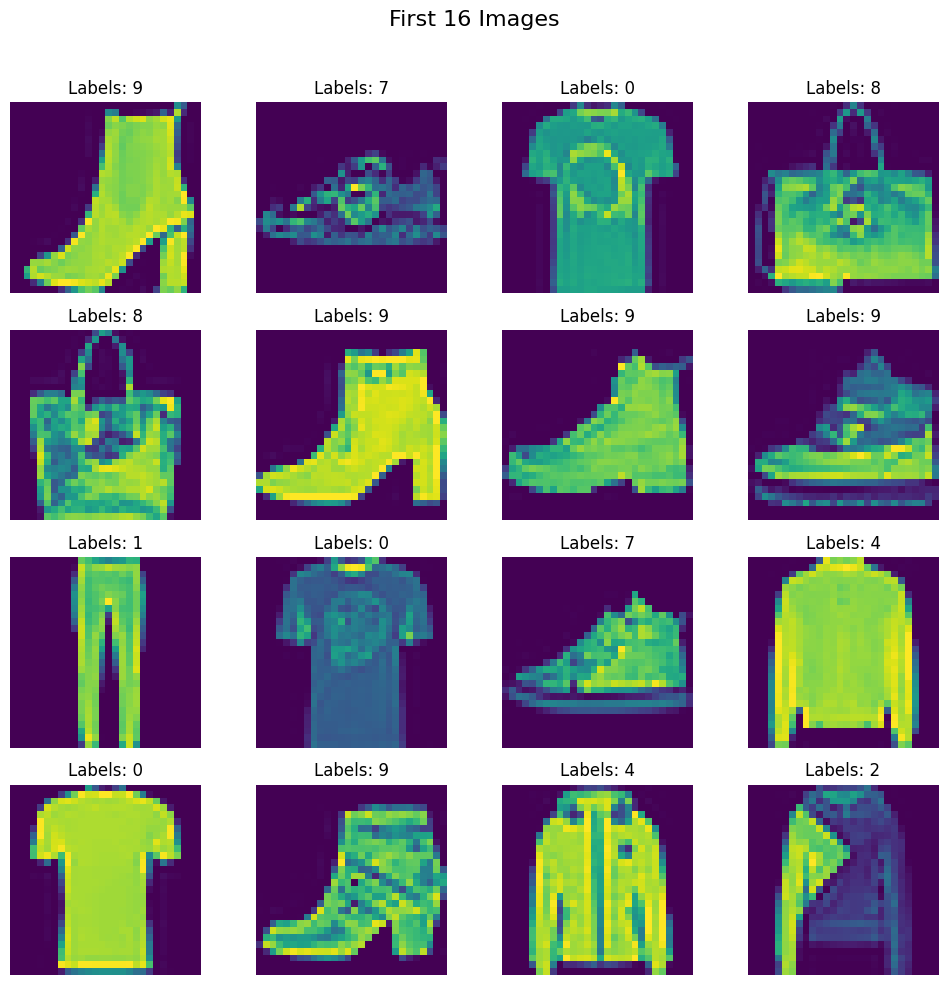

In [15]:
# create a 4x4 grid of images
fig, axes  = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize = 16)

#plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  #reshape to 28x28
    ax.imshow(img)    #display the grayscale
    ax.axis('off')
    ax.set_title(f"Labels: {df.iloc[i, 0]}")

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

In [19]:
x = df.iloc[: , 1:].values
y = df.iloc[: , 0].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
x_train = x_train/255.0
x_test = x_test/255.0


In [23]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)
    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [24]:
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)


In [27]:
# create test dataset
test_dataset = CustomDataset(x_test, y_test)

In [28]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [37]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)
            
        

In [38]:
learning_rate = 0.1
epochs = 100

In [39]:
# instantiate the model
model = MyNN(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [40]:
len(train_loader)

150

In [41]:
# training loop
for epoch in range(epochs):
    
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:

        # forward pass
        outputs = model(batch_features)


        # calculate loss
        loss = criterion(outputs, batch_labels)


        # backpropagation
        optimizer.zero_grad()
        loss.backward()


        # update gradients
        optimizer.step()
        total_epoch_loss+= loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch+1} , Loss: {avg_loss}')
        

Epoch: 1 , Loss: 1.3868501114845275
Epoch: 2 , Loss: 0.7967492737372717
Epoch: 3 , Loss: 0.6713692792256674
Epoch: 4 , Loss: 0.6021381251017253
Epoch: 5 , Loss: 0.5681379521886508
Epoch: 6 , Loss: 0.5142381566762925
Epoch: 7 , Loss: 0.48253408124049507
Epoch: 8 , Loss: 0.45778719867269196
Epoch: 9 , Loss: 0.4237479610244433
Epoch: 10 , Loss: 0.40885702659686407
Epoch: 11 , Loss: 0.39141793409983316
Epoch: 12 , Loss: 0.37366113315025967
Epoch: 13 , Loss: 0.3442521214981874
Epoch: 14 , Loss: 0.3392055433988571
Epoch: 15 , Loss: 0.32474838609496753
Epoch: 16 , Loss: 0.3232470322648684
Epoch: 17 , Loss: 0.3005552090952794
Epoch: 18 , Loss: 0.29251699035366374
Epoch: 19 , Loss: 0.28262468755245207
Epoch: 20 , Loss: 0.2713495003680388
Epoch: 21 , Loss: 0.27121582875649136
Epoch: 22 , Loss: 0.2488103736191988
Epoch: 23 , Loss: 0.24386224548021954
Epoch: 24 , Loss: 0.2419677961121003
Epoch: 25 , Loss: 0.2351159356534481
Epoch: 26 , Loss: 0.21901062712073327
Epoch: 27 , Loss: 0.2495073475191990

In [42]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [43]:
len(test_loader)

38

In [44]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        total = total + batch_labels.shape[0]

        correct = correct + (predicted==batch_labels).sum().item()

print(correct/total)

0.8333333333333334
